# Assignment 3 Comp. Phys
## John Edwards

### Problem 1
#### Solution:

The Max height is: 20.38735983690112


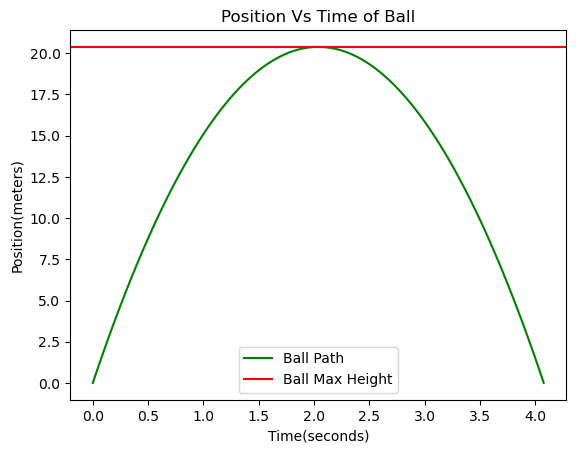

In [6]:
import matplotlib.pyplot as plt
import numpy as np
initial_velocity = 20
GRAVITY = 9.81

#list of times during travel of the ball
time = np.linspace(0, 2*initial_velocity/GRAVITY, 100)

#Position equation
y = position = initial_velocity * time - 0.5 * GRAVITY * time**2

## Plotting graph for Position Vs Time
plt.plot(time, position, label='Ball Path', color="green")
plt.xlabel('Time(seconds)')
plt.ylabel('Position(meters)')
plt.title("Position Vs Time of Ball")

## Max Height

max_height = (initial_velocity**2) / (2*GRAVITY)

print(f'The Max height is: {max_height}')

plt.axhline(y=max_height, color='red', label='Ball Max Height')
plt.legend()
plt.show()


### Problem 2
#### Solution:

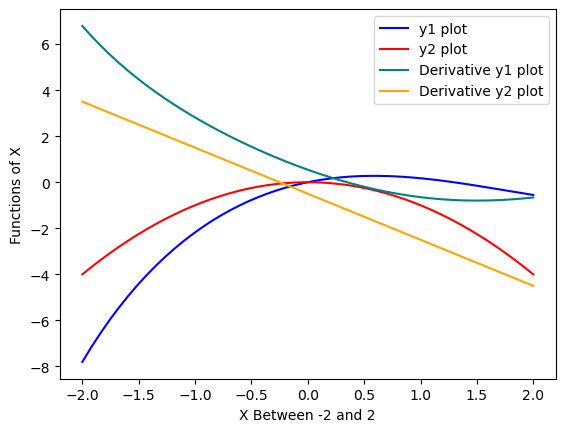

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2,2)
## y1 equation
def fx1(x):
    return np.cos(x) - np.exp(-x)

## y2 equation
def fx2(x):
    return -x**2

def fprime(x):
    return (fx1(x + 0.5) - fx1(x))/0.5

def f2prime(x):
    return (fx2(x + 0.5) - fx2(x))/0.5



deriv1 = np.diff(fx1(x))/0.01
deriv2 = np.diff(fx2(x))/0.01

plt.plot(x,fx1(x),label='y1 plot',color='blue')
plt.plot(x,fx2(x),label='y2 plot',color='red')
plt.plot(x,fprime(x),label='Derivative y1 plot',color='teal')
plt.plot(x,f2prime(x),label='Derivative y2 plot',color='orange')

plt.ylabel('Functions of X')
plt.xlabel('X Between -2 and 2')

plt.legend()
plt.show()







### Problem 3
#### Solution:

line of best fit is y = -3060.07 +/- 12.86 +(1.54 +/- 0.01)x


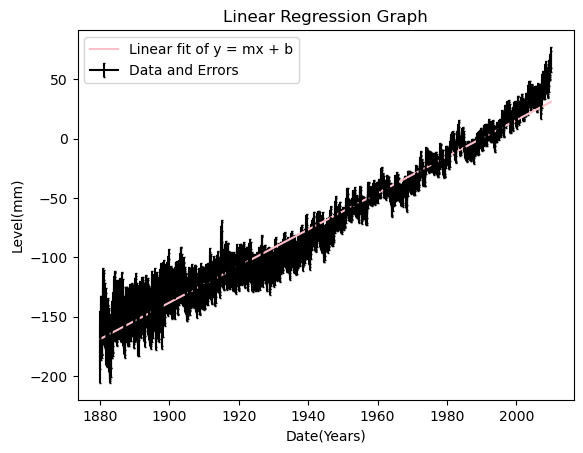

In [5]:
### Linear regression
import numpy as np
data = np.loadtxt('../text-files/CSIRO_Recons_gmsl_mo_2011.txt', str, skiprows=1)
date  = x = np.asfarray(data[:,0])
level = y = np.asfarray(data[:,1])
error = z = np.asfarray(data[:,2])

N = len(x)
# print(f'This is {date}\nThis is {level}\nThis is {error}\n')

#linear regression y = mx + b
m, b = np.polyfit(x,y,1)

#regression vals
#xFit = np.linspace(x[0], x[-1], 100)
xFit = np.linspace(min(x), max(x), 100)
yFit = m * xFit + b

def lstsqr(x,y):
    sumx = 0
    sumy = 0
    sumxx = 0
    sumxy = 0
    A = 0
    B = 0
    
    sumx = sum(x)
    sumy = sum(y)
    sumxx = sum(x*x)
    sumxy = sum(x*y)
    
    Delta = (N*sumxx - sumx*sumx)
    A = (sumxx*sumy - sumx*sumxy)/Delta
    B = (N*sumxy - sumx*sumy)/Delta 
    
    unc_A =  np.sqrt(sum((y - (A+B*x))**2)/(N-2))*np.sqrt(sumxx/Delta)
    unc_B =  np.sqrt(sum((y - (A+B*x))**2)/(N-2))*np.sqrt(N/Delta)  
    
    
    return [A, B, unc_A, unc_B]

coefficients = lstsqr(x,y)
A = coefficients[0]
B = coefficients[1]
unc_A = coefficients[2]
unc_B = coefficients[3]

print(f'line of best fit is y = {A:.2f} +/- {unc_A:.2f} +({B:.2f} +/- {unc_B:.2f})x')



#plot error and linear regression
plt.errorbar(x,y, yerr=error, label='Data and Errors', capsize=.5, color="black")
plt.plot(xFit, yFit, label='Linear fit of y = mx + b', color='pink')
plt.xlabel('Date(Years)')
plt.ylabel('Level(mm)')
plt.title('Linear Regression Graph')

plt.legend()
plt.show()


### Problem 4
#### Solution:

Problem A. Pearsons Correlation for the data: -0.8361457713447407
Problem B. line of best fit is y = -190.33 +/- 18.92 +(-0.03 +/- 0.00)x
Chi Calculation is: -1.6991397509376909
Problem D. Evaluation of goodness of Fit:
A = -1.7312948635902012e-10 +/- 1.7636229818021308e-10
B = 7.316514667474646e-06 +/- 8.191851357526838e-06
C = -0.12621073780760464 +/- 0.12480519033575789
D = 244.54285046339436 +/- 623.2026762001993
Problem E. Each year the O2 Levels Decrease on average
The Linear Regression of the data is: 


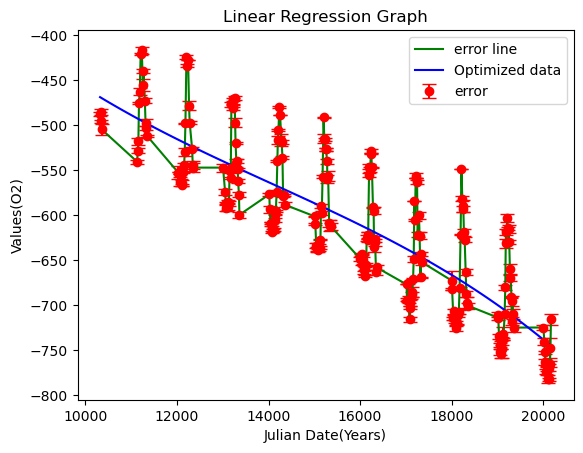

In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np 

data = np.loadtxt('../text-files/Global_O2_Concentration_2010_2020.txt',str,skiprows=1) 
date = data[:,0]
time  = data[:,1]
julian_date  = np.asfarray(data[:,2])
val  = np.asfarray(data[:,3])
std  = np.asfarray(data[:,4])
N = len(julian_date)

#correlation = np.corrcoef(julian_date, val)
#pearsonCorr = correlation[0,1]

def model(x,a,b,c,d):
    # return a*np.cos(2*np.pi/b*x + c ) + d
    return a * x**3 + b * x**2 + c * x + d

# A0,B0,C0,D0 = np.std(val), 1600, 0, np.mean(val)
param, param_cov = curve_fit(model, julian_date, val) #p0=[])

def r_calc(x, y):
    r = 0
    sum_diff_xy = 0
    sum_xdiff_square = 0
    sum_ydiff_square = 0
    
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    sum_xdiff_square = sum((x- x_bar)**2)
    sum_ydiff_square =  sum((y-y_bar)**2)
    sum_diff_xy = sum((x-x_bar)*(y - y_bar))
    
    r = sum_diff_xy/np.sqrt(sum_xdiff_square*sum_ydiff_square)

    
    return r

pearsons_calc = r_calc(julian_date,val)

print(f'Problem A. Pearsons Correlation for the data: {pearsons_calc}')

def lstsqr(x,y):
    sumx = 0
    sumy = 0
    sumxx = 0
    sumxy = 0
    A = 0
    B = 0
    
    sumx = sum(x)
    sumy = sum(y)
    sumxx = sum(x*x)
    sumxy = sum(x*y)
    
    Delta = (N*sumxx - sumx*sumx)
    A = (sumxx*sumy - sumx*sumxy)/Delta
    B = (N*sumxy - sumx*sumy)/Delta 
    
    unc_A =  np.sqrt(sum((y - (A+B*x))**2)/(N-2))*np.sqrt(sumxx/Delta)
    unc_B =  np.sqrt(sum((y - (A+B*x))**2)/(N-2))*np.sqrt(N/Delta)  
    
    
    return [A, B, unc_A, unc_B]

coefficients = lstsqr(julian_date,val)
A = coefficients[0]
B = coefficients[1]
unc_A = coefficients[2]
unc_B = coefficients[3]

print(f'Problem B. line of best fit is y = {A:.2f} +/- {unc_A:.2f} +({B:.2f} +/- {unc_B:.2f})x')

def chi_calc(x,y,A,B):
    chi_squared = 0
    sigy = np.std(y)
    for i in range(N):
        chi_squared = chi_squared + (y[i] - (A + B*x[i]))**2/sigy**2
    return chi_squared

chi_answer = chi_calc(julian_date, val, A,B)

print(f'Chi Calculation is: {chi_answer/N-2}')

aFit = param[0]
bFit = param[1]
cFit = param[2]
dFit = param[3]


xFit = np.linspace(julian_date[0], julian_date[-1], 100)
yFit = model(xFit, aFit, bFit, cFit, dFit)

paramError = np.sqrt(np.diag(param_cov))
aUncertain = paramError[0]
bUncertain = paramError[1]
cUncertain = paramError[2]
dUncertain = paramError[3]

print(f'Problem D. Evaluation of goodness of Fit:\nA = {aFit} +/- {aUncertain}\nB = {bFit} +/- {bUncertain}\nC = {cFit} +/- {cUncertain}\nD = {dFit} +/- {dUncertain}')
print(f'Problem E. Each year the O2 Levels Decrease on average')
print(f'The Linear Regression of the data is: ')
plt.errorbar(julian_date,val, yerr=std,label='error',fmt='o', color='red', capsize=5)
plt.plot(julian_date,val, color='green', label='error line')
plt.plot(xFit, yFit, label='Optimized data', color='blue')
plt.xlabel('Julian Date(Years)')
plt.ylabel('Values(O2)')
plt.title('Linear Regression Graph')

plt.legend()
plt.show()

